<h1>Logistic Regression</h1>

## Import Library

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)

# Membaca Data

In [ ]:
df = pd.read_csv('../Data/stunting_wasting_dataset.csv')

df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


## Melihat informasi umum dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


# Data Pre-processing

<li>Cek Missing Value</li>

In [10]:
df.isnull().sum()

Jenis Kelamin        0
Umur (bulan)         0
Tinggi Badan (cm)    0
Berat Badan (kg)     0
Stunting             0
Wasting              0
dtype: int64

<li>Cek Duplikat Data</li>

In [63]:
df.duplicated().sum()

np.int64(0)

<li>Hapus Duplikat Data</li>

In [20]:
df = df.drop_duplicates()

<li>Cek Nilai Unik </li>

In [32]:
print(df['Stunting'].unique())

print(df['Jenis Kelamin'].unique())



['Tall' 'Stunted' 'Normal' 'Severely Stunted']
['Laki-laki' 'Perempuan']


<li>Mapping Kolom Kategorik ke Bentuk Numerik</li>

In [30]:
#1. Mapping kolom Stunting -> biner
map_stunt = {'Stunted': 1, 'Severely Stunted': 1, 'Normal': 0, 'Tall': 0}
df['Stunting_bin'] = df ['Stunting'].map(map_stunt).astype('Int64')
#2. Mapping kolom Jenis Kelamin -> biner
# Laki-Laki = 1, Perempuan = 0
df['JK_bin'] = (df['Jenis Kelamin'] == 'Laki-laki').astype(int)
print("Distribusi Stunting_bin:\n", df['Stunting_bin'].value_counts())
print("\nDistribusi JK_bin: \n", df['JK_bin'].value_counts())

Distribusi Stunting_bin:
 Stunting_bin
0    72320
1    20372
Name: count, dtype: Int64

Distribusi JK_bin: 
 JK_bin
1    46353
0    46339
Name: count, dtype: int64


<li>Analisis Korelasi Antar Variabel Numerik</li>

In [35]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting_bin,JK_bin
Umur (bulan),1.000000,0.874162,0.659566,0.037173,0.000636
Tinggi Badan (cm),0.874162,1.000000,0.618453,-0.288216,0.070159
Berat Badan (kg),0.659566,0.618453,1.000000,0.020676,0.043446
Stunting_bin,0.037173,-0.288216,0.020676,1.000000,-0.005187
JK_bin,0.000636,0.070159,0.043446,-0.005187,1.000000


<li>Visualisasi Heatmap Korelasi</li>

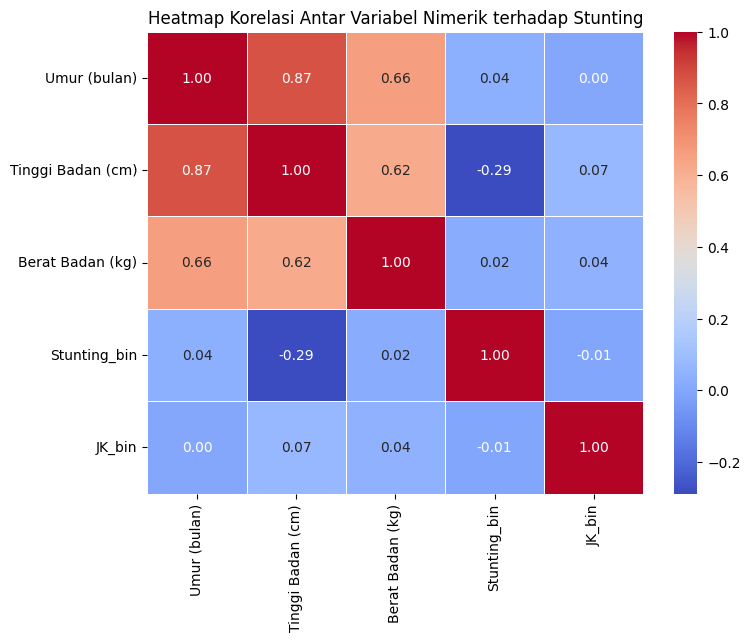

In [40]:
# Visualisasi Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)
plt.title("Heatmap Korelasi Antar Variabel Nimerik terhadap Stunting", fontsize=12)
plt.show()

## Pembagian Dataset (Training dan Testing)

<li>Menentukan Fitur dan Target</li>

In [43]:
# Fitur numerik dan gender
feature_num = ['Umur (bulan)', 'Tinggi Badan (cm)', 'Berat Badan (kg)']
feature_bin = ['JK_bin']

# Gabungkan & drop missing
use_cols = feature_num + feature_bin + ['Stunting_bin']
df_model = df [use_cols].dropna().copy()

X = df_model [feature_num + feature_bin]
y = df_model['Stunting_bin']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (92692, 4)
y shape: (92692,)


<li>Membagi Dataset menjadi Training dan Testing Set</li>

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Data latih:", X_train.shape)
print("Data uji:", X_test.shape)    

Data latih: (74153, 4)
Data uji: (18539, 4)


## Pembangunan Model Logistic Regression

In [48]:
# Scale hanya fitur numerik, gender Langsung passthrough
preprocess = ColumnTransformer(
    transformers=[
    ('num', StandardScaler (), feature_num),
    ('bin', 'passthrough', feature_bin)
    ],
    remainder='drop'
)

model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    class_weight='balanced',
    random_state=42
)

clf = Pipeline([
    ('preprocess', preprocess),
    ('model', model)
])

# Latih model
clf.fit(X_train, y_train)
print("👊🏻✅ Model Logistic Regression berhasil dilatih.")

👊🏻✅ Model Logistic Regression berhasil dilatih.


## Prediksi Model dan Evaluasi Model

In [50]:
# Prediksi & probabilitas
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]
#Hitung metrik
print(f"Akurasi : (accuracy_score(y_test, y_pred):.4f)")
print(f"Precision (precision_score(y_test, y_pred, zero_division=0):.4f)")
print(f"Recall : {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1-Score: (f1_score(y_test, y_pred, zero_division=0):.4f)")
print(f"ROC-AUC : {roc_auc_score(y_test, y_prob):.4f}")

Akurasi : (accuracy_score(y_test, y_pred):.4f)
Precision (precision_score(y_test, y_pred, zero_division=0):.4f)
Recall : 0.9571
F1-Score: (f1_score(y_test, y_pred, zero_division=0):.4f)
ROC-AUC : 0.9651


## Visualisasi Hasil Evaluasi

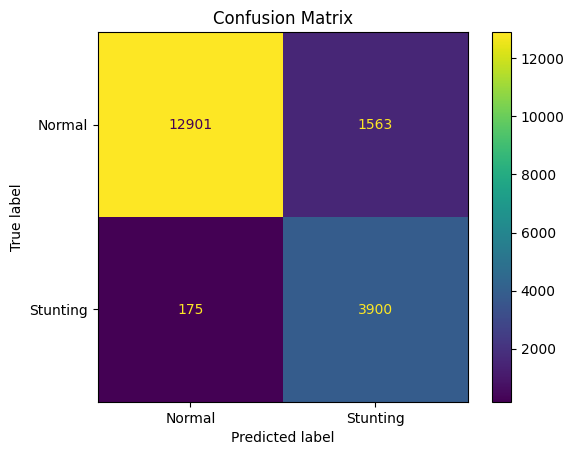

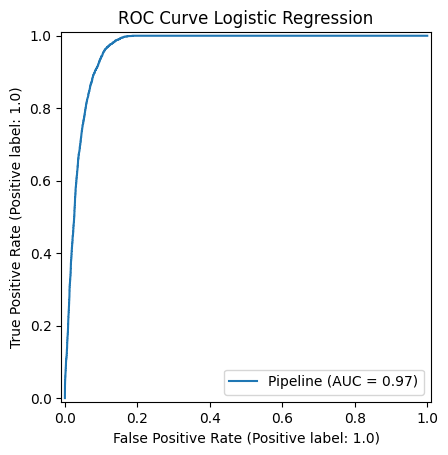

In [ ]:
# Confusion Matrix
ConfusionMatrixDisplay (confusion_matrix(y_test, y_pred),
                        display_labels=['Normal', 'Stunting']
                        ).plot(values_format='d')
plt.title("Confusion Matrix")
plt.show()

#ROC Curve
RocCurveDisplay.from_estimator (clf, X_test, y_test)
plt.title("ROC Curve Logistic Regression")
plt.show()

## Classification Report

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Tidak Stunting (0)', 'Stunting (1)']))

                    precision    recall  f1-score   support

Tidak Stunting (0)       0.99      0.89      0.94     14464
      Stunting (1)       0.71      0.96      0.82      4075

          accuracy                           0.91     18539
         macro avg       0.85      0.92      0.88     18539
      weighted avg       0.93      0.91      0.91     18539



## Classification Report

In [54]:
from sklearn.model_selection import cross_val_score
# Lakukan cross validation (cv=5 berarti 5-fold)
scores = cross_val_score(clf, X, y, cv=5)
# Tampilkan hasil
print("Skor tiap fold:",
scores)
print("Rata-rata akurasi:", np.mean (scores))
print("Standar deviasi:", np.std(scores))

Skor tiap fold: [0.9084093  0.90414801 0.90468227 0.90673212 0.9028482 ]
Rata-rata akurasi: 0.9053639814725255
Standar deviasi: 0.001970695381359219


## Interpretasi Model Logistic Regression

In [57]:
#Ambil nama fitur & koefisien
feat_names = feature_num + feature_bin
coefs = clf.named_steps['model'].coef_[0]
odds = np.exp(coefs)
coef_df= pd.DataFrame({
'Fitur': feat_names,
'Koefisien (log-odds)':
coefs,
'Odds Ratio (e^coef)':
odds
}).sort_values('Odds Ratio (e^coef)', ascending=False)
display(coef_df)

,Fitur,Koefisien (log-odds),Odds Ratio (e^coef)
0,Umur (bulan),8.661420,5775.733054
3,JK_bin,1.726339,5.620042
2,Berat Badan (kg),0.653153,1.921590
1,Tinggi Badan (cm),-10.742834,0.000022


## Prediksi Data Baru (Contoh Kasus)

In [62]:
# Contoh 2 anak
data_baru = pd.DataFrame({
    'Umur (bulan)': [24, 10],
    'Tinggi Badan (cm)': [79.0, 72.5],
    'Berat Badan (kg)': [9.2, 7.8],
    'JK_bin': [1, 0] # 1=Laki-laki, 0-Perempuan
})
pred = clf.predict(data_baru)
prob = clf.predict_proba(data_baru) [:,1]
hasil = data_baru.copy()
hasil['Prob_Stunting'] = prob
hasil['Pred (0=Tidak, 1=Ya)'] = pred
display(hasil)

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),JK_bin,Prob_Stunting,"Pred (0=Tidak, 1=Ya)"
0,24,79.0,9.2,1,0.998346,1.0
1,10,72.5,7.8,0,0.001810,0.0
